In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
from matplotlib import cm
from sklearn import metrics
import sys

scripts_dir = './scripts/'
sys.path.append(scripts_dir)
import pathogenScoreFns

%matplotlib inline

### Run Analysis on mBAL Study Samples

In [3]:
reference_pathogens = open('./data/known_respiratory_pathogens.txt','r').readlines()
reference_pathogens = [i.strip() for i in reference_pathogens]

metadata = pd.read_csv('./data/project-mbal_study_sample-table_073018.csv')

classif = {}
for i in metadata.index:
    try:
        if 'RNA' in metadata.loc[i]['sample_name']:
            classif[metadata.loc[i]['sample_name']] = metadata.loc[i]['notes'].split('\r')[0].split(':')[1].strip()
    except:
        continue

true_class = pd.Series(classif)

mBAL_microbe_stats = pathogenScoreFns.get_microbe_stats("./data/mbal_study_reports_073018/*.csv", reference_pathogens)

./scripts/pathogenScoreFns.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['genus_name'] = genera
./scripts/pathogenScoreFns.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['possible_pathogen'] = possibly_pathogen
./scripts/pathogenScoreFns.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keep['NT

In [5]:
mBAL_summary = pathogenScoreFns.summarize_results(mBAL_microbe_stats, "MBAL")
mBAL_summary.head()

,bact_pathogenic_total,bact_total,other_pathogenic_total,other_total,virus_pathogenic_total,virus_total,B,V,O,B_tot,V_tot,O_tot,log_pathogenic_bact_total,log_pathogenic_virus_total,log_pathogenic_other_total
MBAL-202-RNA-TA,69.633292,1186.0,7.4,362.7,77036.8,77038.2,0.058713,0.999982,0.020403,0.000886,0.980275,0.000094,1.849009,4.886704,0.924279
MBAL-205-RNA-TA,3.225101,62.2,0.0,6.8,831.9,854.9,0.051851,0.973096,0.000000,0.003491,0.900422,0.000000,0.625837,2.920593,0.000000
MBAL-208-RNA-TA,121.105023,697.1,0.0,33.4,0.0,0.2,0.173727,0.000000,0.000000,0.165738,0.000000,0.000000,2.086734,0.000000,0.000000
MBAL-209-RNA-TA,2665.638094,2763.2,0.0,2.3,0.0,3.9,0.964692,0.000000,0.000000,0.962533,0.000000,0.000000,3.425964,0.000000,0.000000
MBAL-211-RNA-TA,6.990789,35.9,0.0,0.7,0.0,0.0,0.194730,0.000000,0.000000,0.191005,0.000000,0.000000,0.902590,0.000000,0.000000


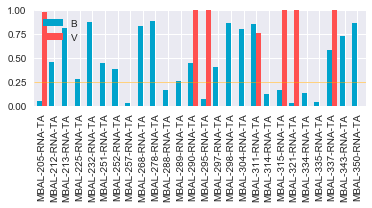

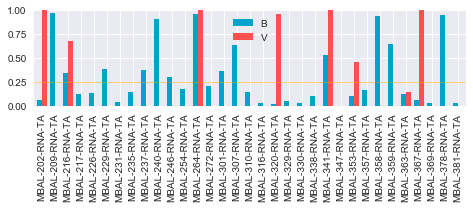

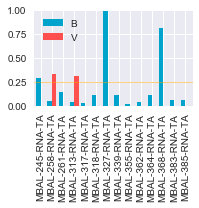

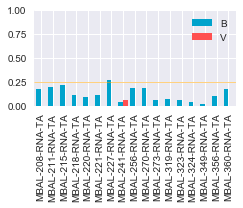

0.8800904977375565


In [6]:
### PLOTS SPECIFIC to mBAL STUDY
output_dir = './output/'

labs1 = list(true_class[true_class == 'LRTI+C+M'].index)
mBAL_summary.loc[[i.upper() for i in labs1]][['B','V']].plot(kind='bar',figsize=(.2*len(labs1),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G1.pdf')
plt.show()

labs2 = list(true_class[true_class == 'LRTI+C'].index)
mBAL_summary.loc[[i.upper() for i in labs2]][['B','V']].plot(kind='bar',figsize=(.2*len(labs2),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G2.pdf')
plt.show()

labs3 = list(true_class[true_class == 'LRTI-unk'].index)
mBAL_summary.loc[[i.upper() for i in labs3]][['B','V']].plot(kind='bar',figsize=(.2*len(labs3),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G3.pdf')
plt.show()

labs4 = list(true_class[true_class == 'no-LRTI'].index)
mBAL_summary.loc[[i.upper() for i in labs4]][['B','V']].plot(kind='bar',figsize=(.2*len(labs4),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G4.pdf')
plt.show()

print(metrics.roc_auc_score([1 for i in labs1] + [0 for i in labs4], 
                      list(np.max(mBAL_summary.loc[[i.upper() for i in labs1 + labs4]][['B','V']].transpose()))))

### Run Analysis on Bangladesh Samples

In [8]:
reference_pathogens = open('/Users/kkalantar/Desktop/pathoModel/reference/pathogens_bangladesh_official.txt','r').readlines()
reference_pathogens = [i.strip() for i in reference_pathogens]

metadata = pd.read_csv('/Users/kkalantar/Desktop/pathoModel/data/070518/combined_metadata.tsv', sep='\t')

classif = {}
for i in metadata.index:
    try:
        classif[metadata.loc[i]['sample_name_RNA']] = metadata.loc[i]['effective_group']
    except:
        continue
true_class = pd.Series(classif)

bangladesh_microbe_stats = pathogenScoreFns.get_microbe_stats("/Users/kkalantar/Desktop/pathoModel/data/070518/rapid-response-007_reports/*.csv", reference_pathogens)

./scripts/pathogenScoreFns.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['genus_name'] = genera
./scripts/pathogenScoreFns.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['possible_pathogen'] = possibly_pathogen
./scripts/pathogenScoreFns.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keep['NT

In [12]:
bangladesh_summary = pathogenScoreFns.summarize_results(bangladesh_microbe_stats, "MBAL")
bangladesh_summary.head()

,bact_pathogenic_total,bact_total,other_pathogenic_total,other_total,virus_pathogenic_total,virus_total,B,V,O,B_tot,V_tot,O_tot,log_pathogenic_bact_total,log_pathogenic_virus_total,log_pathogenic_other_total
CHRF_RNA_0000_S97,75.397436,572.2,0.0,211.9,0.0,27.8,0.131768,0.0,0.0,0.092865,0.0,0.0,1.883079,0.0,0.0
CHRF_RNA_0001_S1,75.628897,920.6,0.0,339.0,0.0,15.3,0.082152,0.0,0.0,0.059321,0.0,0.0,1.884393,0.0,0.0
CHRF_RNA_0002_S2,19001.320869,19329.5,0.0,30.9,0.0,5.8,0.983022,0.0,0.0,0.981159,0.0,0.0,4.278807,0.0,0.0
CHRF_RNA_0003_S3,61.644036,332.3,0.0,83.1,0.0,31.7,0.185507,0.0,0.0,0.137875,0.0,0.0,1.796880,0.0,0.0
CHRF_RNA_0004_S4,157.883819,2476.8,0.0,388.1,0.0,46.9,0.063745,0.0,0.0,0.054222,0.0,0.0,2.201080,0.0,0.0


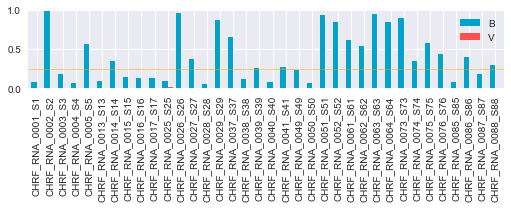

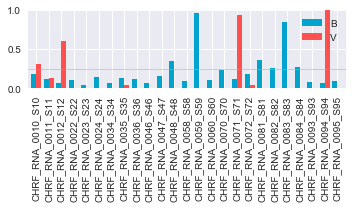

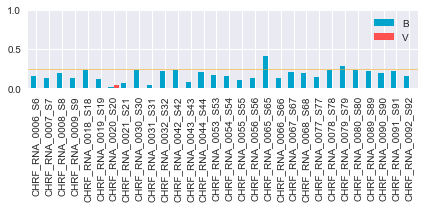

0.6777777777777778


In [13]:
# PLOTS SPECIFIC TO BANGLADESH STUDY

labs1 = list(true_class[true_class == 1].index)
bangladesh_summary.loc[[i.upper() for i in labs1]][['B','V']].plot(kind='bar',figsize=(.2*len(labs1),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G1_bang.pdf')
plt.show()

labs3 = list(true_class[true_class == 3].index)
bangladesh_summary.loc[[i.upper() for i in labs3]][['B','V']].plot(kind='bar',figsize=(.2*len(labs3),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G3_bang.pdf')
plt.show()

labs4 = list(true_class[true_class == 4].index)
bangladesh_summary.loc[[i.upper() for i in labs4]][['B','V']].plot(kind='bar',figsize=(.2*len(labs4),3), width=.8, ylim=(0,1),
                                                          color=['#00a3cc','#ff5050'])
plt.axhline(y = .25, linewidth=.5, color='orange')
plt.tight_layout()
plt.savefig(output_dir + 'pathoScore_G4_bang.pdf')
plt.show()

print(metrics.roc_auc_score([1 for i in labs1] + [0 for i in labs4], 
                      list(np.max(bangladesh_summary.loc[[i.upper() for i in labs1 + labs4]][['B','V']].transpose()))))